# DDM23/24 - Reverse Engineering Cambridge Analytica
Lo scopo di questo notebook é imitare la stessa segmentazione fatta da Cambridge Analytica sugli utenti "app" che avevano compilato il sondaggio (rif. Articolo del Guardian e film The Great Hack (2019))

Utilizzeremo un Dataset proveniente da [Open Psychometrics](https://openpsychometrics.org/tests/IPIP-BFFM/) (non più disponibile online, pare - nel repo github del corso trovate il file ocean_data.csv con un sample del campione originale)

Lo scopo è arrivare a effettuare un clustering degli utenti per trovare N cluster che poi possano essere analizzati e che delineino un "profilo comportamentale", la famosa "variabile target" che permetterà a C.A. di delineare il profilo comportamentale anche degli utenti (la maggior parte dei cittadini americani) a cui non ha somministrato il sondaggio.

Nel capitolo 6 del libro si trova la spiegazione dell'esercizio e delle variabili.


## Importazione
Iniziamo importando il dataset e vedendone le dimensioni

In [2]:
import pandas as pd

# Load the dataset
ocean_data = pd.read_csv('data/ocean_data.csv')
ocean_data.head()



,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0,4,3,5,2,4,2,4,3,3,...,2,2,4,1,3,1,3,1,3,3
1,1,1,3,1,4,3,3,1,5,1,...,2,4,3,3,2,4,5,3,3,2
2,2,3,3,1,3,3,3,5,3,3,...,5,1,5,2,4,1,1,2,3,4
3,3,1,5,4,5,1,1,1,5,2,...,2,5,5,1,4,1,2,1,5,4
4,4,4,5,4,2,5,1,5,2,5,...,5,1,3,2,5,2,5,5,5,5


In [11]:
print(ocean_data.shape)

(304088, 51)


## Normalizzazione

In [3]:
from sklearn.preprocessing import StandardScaler

# Drop the "Unnamed: 0" column
ocean_data = ocean_data.drop(columns=["Unnamed: 0"])

# Standardize the values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ocean_data)

scaled_data_df = pd.DataFrame(scaled_data, columns=ocean_data.columns)
scaled_data_df.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.067300,0.170590,1.407529,-0.923461,0.566696,-0.328073,0.878128,-0.324316,0.025316,-1.193657,...,-1.431173,-0.067222,-0.000477,-0.914300,-0.799034,-0.808315,-0.971214,-1.738261,-1.081693,-0.927542
1,-1.303374,0.170590,-1.885902,0.693485,-0.216256,0.488405,-1.264881,1.246340,-1.459421,-0.426621,...,-1.431173,1.731793,-0.912362,0.919589,-1.805945,1.909576,1.013855,-0.146442,-1.081693,-1.894355
2,0.277076,0.170590,-1.885902,-0.114988,-0.216256,0.488405,1.592465,-0.324316,0.025316,0.340415,...,1.162437,-0.966729,0.911408,0.002644,0.207877,-0.808315,-2.956283,-0.942351,-1.081693,0.039272
3,-1.303374,1.681996,0.584171,1.501958,-1.782160,-1.144551,-1.264881,1.246340,-0.717052,1.107451,...,-1.431173,2.631300,0.911408,-0.914300,0.207877,-0.808315,-1.963749,-1.738261,0.841964,0.039272
4,1.067300,1.681996,0.584171,-0.923461,1.349648,-1.144551,1.592465,-1.109645,1.510054,-1.193657,...,1.162437,-0.966729,-0.912362,0.002644,1.214787,0.097649,1.013855,1.445378,0.841964,1.006085


## Clustering Gerarchico

Proviamo ora a effettuare un clustering gerarchico. Cosa succede?

Il kernel crasha con: *Your session crashed after using all available RAM. *

L'algoritmo non riesce a procedere con i calcoli, l'errore dice che dovrebbe allocare 360 Gb di ram (google colab, nella versione free, ne ha 13).

Infatti, come abbiamo visto, a funzione "linkage" nel clustering gerarchico calcola la matrice di correlazione di dimensione NxN,

in questo caso 300000x300000 = 90M x 4bytes (dimensione minima del numero floating in memoria point) = 360 Gb


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix using ward linkage and euclidean distance
Z = linkage(scaled_data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode = 'level', p = 10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

# Caricamenti dei Fattori (PCA)

Per curiosità effettuiamo un Analisi Fattoriale per vedere come sono distribuiti i caricamenti dei fattori

In [4]:
# Apply PCA and reduce the data to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=scaled_data.shape[1])
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_




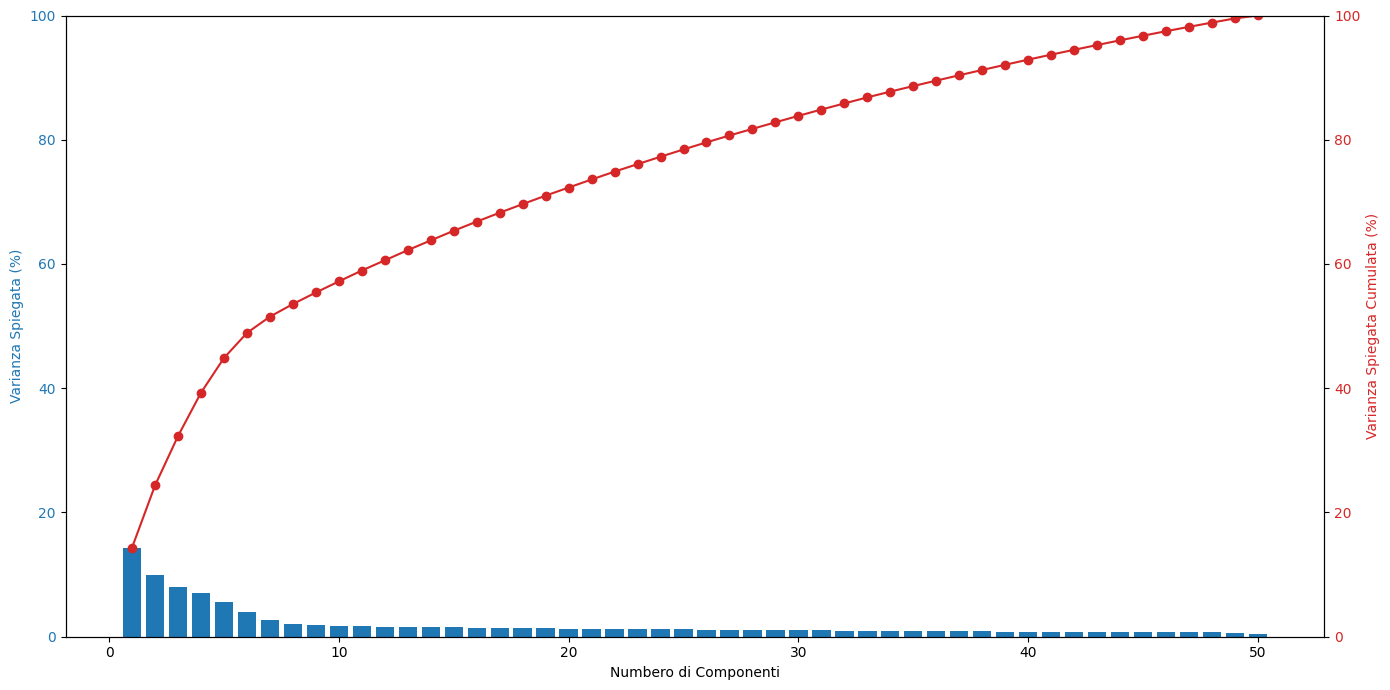

In [5]:

import matplotlib.pyplot as plt
import numpy as np

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Numbero di Componenti')
ax1.set_ylabel('Varianza Spiegata (%)', color=color)
ax1.bar(range(1, len(explained_variance) + 1), explained_variance*100, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 100])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Varianza Spiegata Cumulata (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance*100, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 100])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Notiamo che i caricamenti dei primi fattori non spiegano molta varianza (dopo 4 componenti principali siamo appena al 40%): essa è distribuita in modo abbastanza uniforme. Questo significa che **il sondaggio é ben escogitato** e non c'é troppa correlazione tra le variabili, cioé la risposta a ogni domanda **aggiunge informazione** e non é ridondante.

Considerando comunque che il carico computazionale per il clustering gerarchico dipende **solo** dal numero di righe e non da quello di colonne, scopriamo come prima cosa che probabilmente per questo dataset non é stato utilizzato un clustering agglomerativo ma un clustering divisivo. Proviamolo.

## K-Means (non richiesto all'esame)
Mostriamo primaditutto il diagramma Elbow per decidere il numero di cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

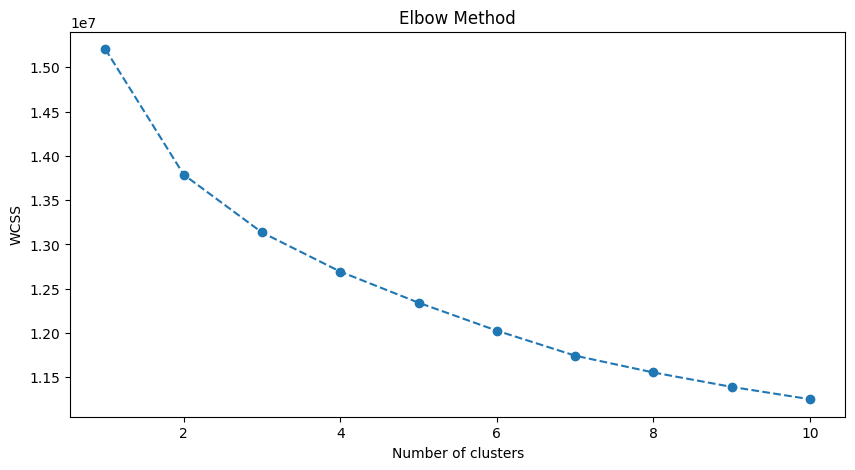

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares

# We will check for up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the results on a graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Pare che la distanza within-cluster sia monotonicamente discendente, quindi probabilmente ci sono molti cluster.

Ne scegliamo 5, arbitrariamente, e plottiamo sulle prime due componenti principali, che però sappiamo **non catturare molta varianza**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


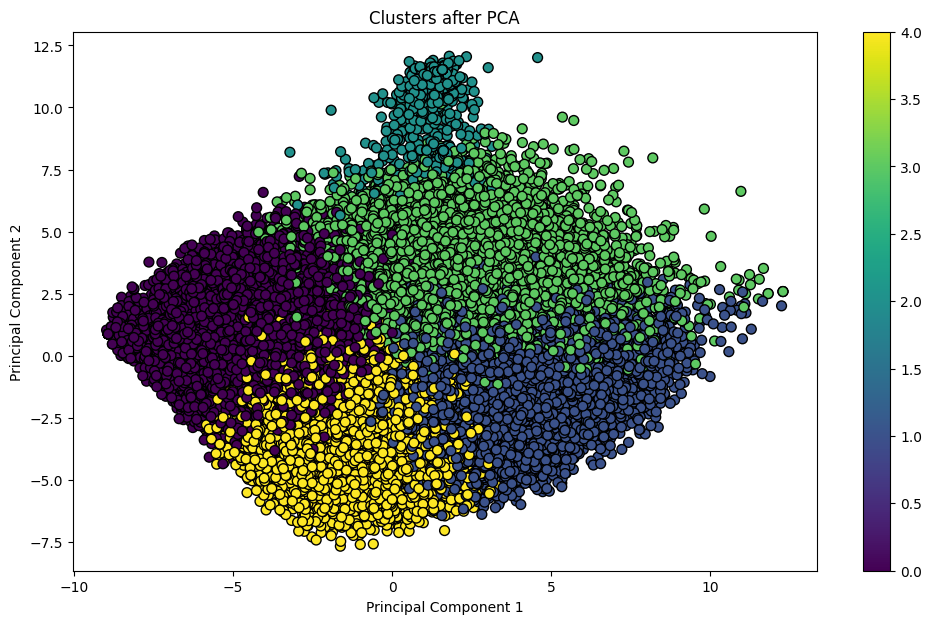

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_assignments = kmeans.fit_predict(scaled_data)

# Apply PCA and reduce the data to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Plotting the 2D data points with cluster assignments
plt.figure(figsize=(12, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=cluster_assignments, edgecolor='k', s=50, cmap='viridis')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


Conclusione:

Sappiamo che le prime due componenti della PCA non catturano abastanza varianza (circa il 25%) per poter basare alcuna deduzione su questo grafico.

Sará quindi consigliato procedere in uno dei due seguenti modi - entrambi richiedono di dotarsi di pazienza:
- eseguire una PCA per esempio, per le prime 25 componenti, che catturano l'80% di varianza, descrivere ogni componente principale in base ai caricamenti delle variabili. Eseguire quindi un clustering K-means e interpretare i risultati della differenza tra le medie (centroidi) di ogni cluster sui 25 caricamenti
- eseguire un clustering sulle variabili originali e semplicemente provare a descrivere i cluster in base a esse

Segue, per ripasso, una visualizzazione tabellare dei caricamenti dei primi quattro fattori

In [ ]:
# Compute PCA for the first 4 components
pca_4 = PCA(n_components=4)
pca_4.fit(scaled_data)

# Extract the factor loadings
factor_loadings = pca_4.components_.T

# Create a dataframe to display the factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'PC{i+1}' for i in range(4)], index=ocean_data.columns)
factor_loadings_df


,PC1,PC2,PC3,PC4
EXT1,-0.199940,-0.097775,0.175528,0.019200
EXT2,0.198128,0.093310,-0.203407,-0.046581
EXT3,-0.256334,-0.054377,0.085984,0.075324
EXT4,0.216688,0.022014,-0.215250,-0.045388
EXT5,-0.240794,-0.122283,0.108122,0.031452
EXT6,0.201385,0.072660,-0.122506,0.056185
EXT7,-0.227374,-0.103877,0.148431,0.037944
EXT8,0.148284,0.026413,-0.230354,0.006653
EXT9,-0.180122,-0.092162,0.168418,-0.069746
EXT10,0.213476,0.001065,-0.199369,-0.043423
